#**NUMBER RECOGNITION**

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist

**We will first import necessary packages and then download the MNIST dataset**

In [ ]:
data=mnist.load_data()

**As the dataset is in images we will convert the given data into array**

In [ ]:
data=np.array(data)
data

<ipython-input-42-ff6eb3dd0fda>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


array([[array([[[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]],

               [[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]],

               [[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]],

               ...,

               [[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..

**We will now split the data and make it ready for developing the model**

In [ ]:
(xtrain,ytrain),(xtest,ytest)=data
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

**The below code snippet displays the images of the first 20 hand written numbers from the dataset**

In [ ]:
def shownum(i):
  plt.imshow(xtrain[i])
  plt.title(ytrain[i])
  plt.show()

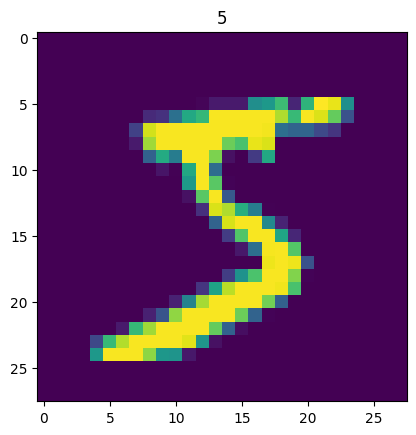

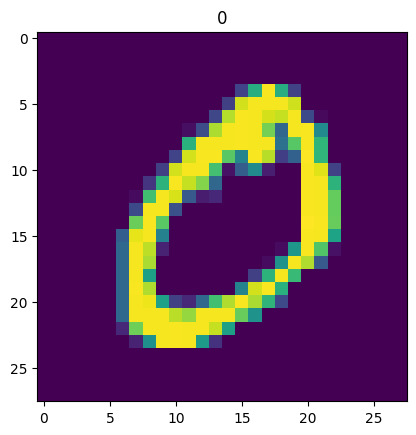

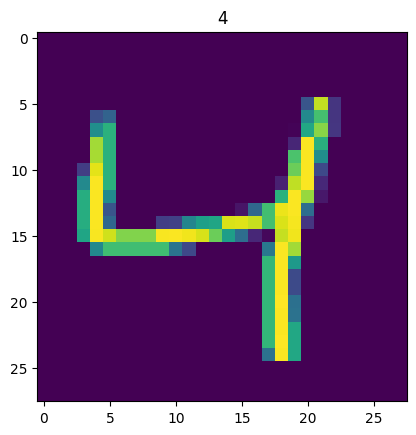

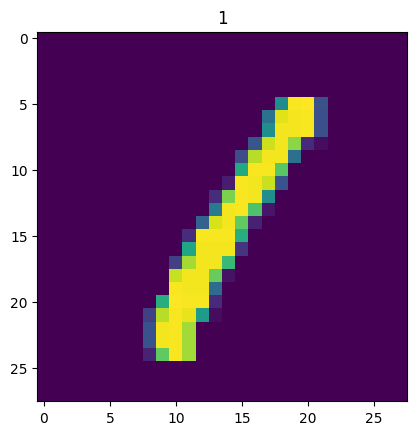

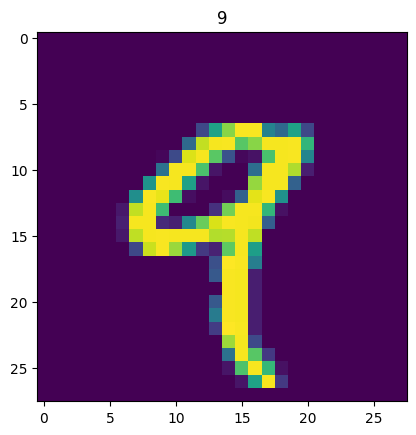

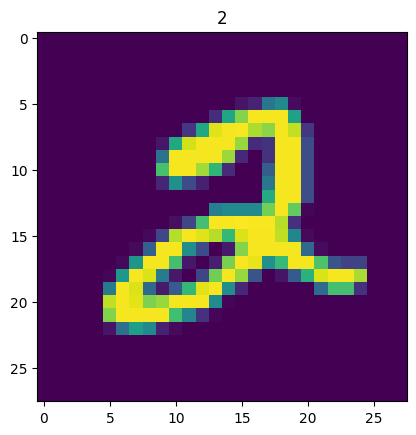

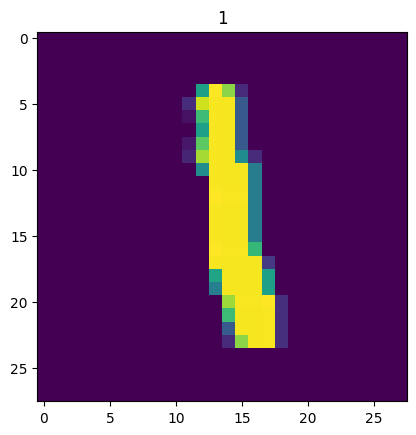

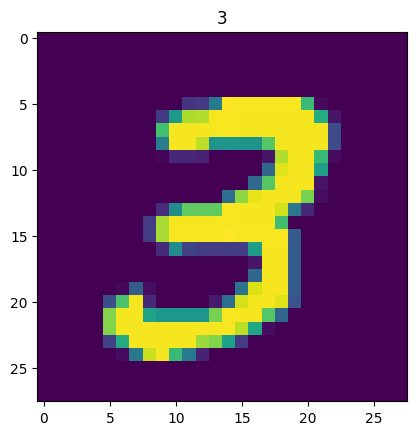

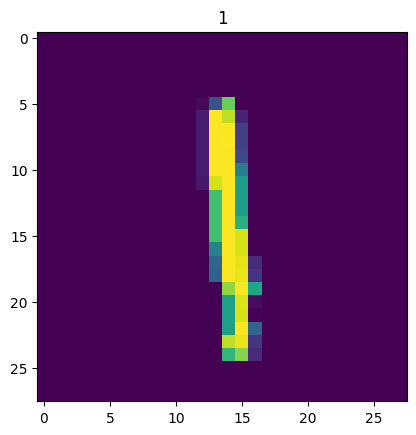

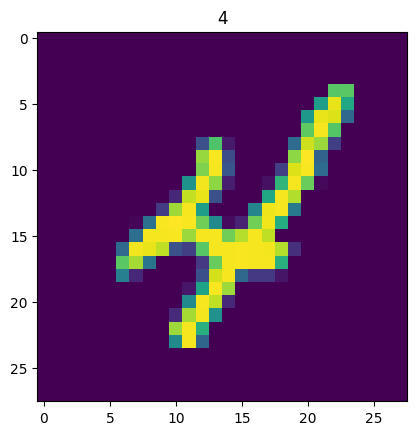

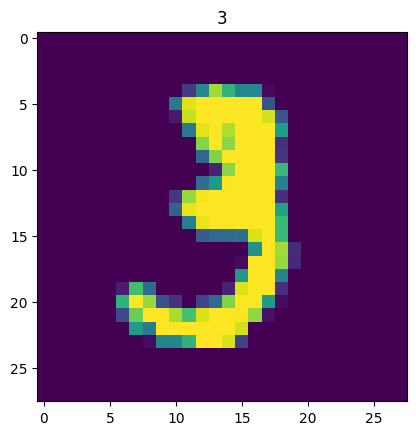

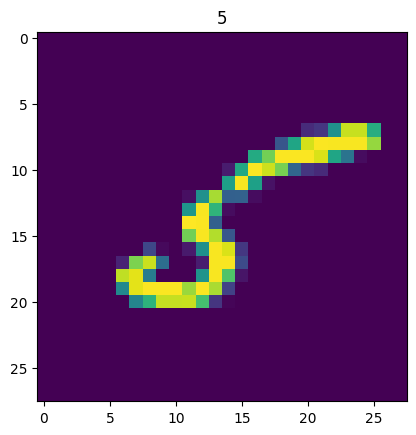

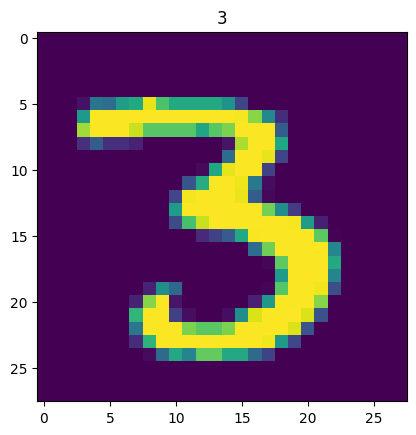

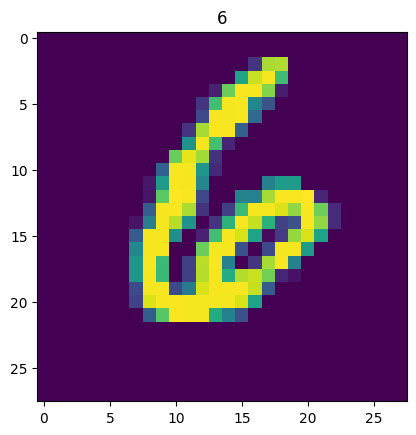

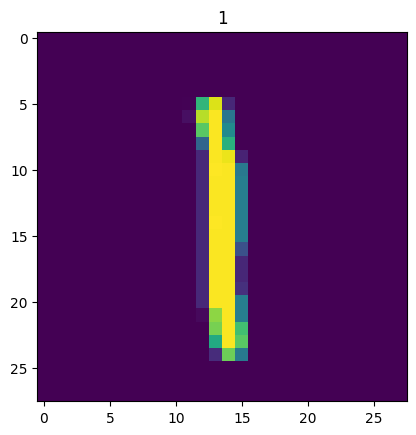

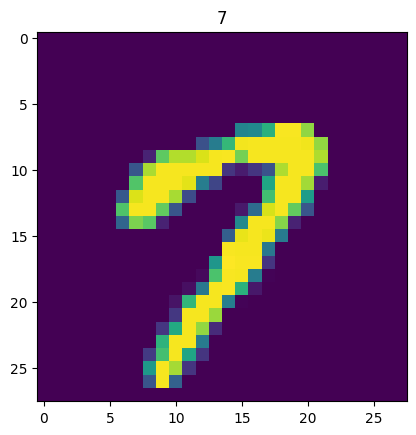

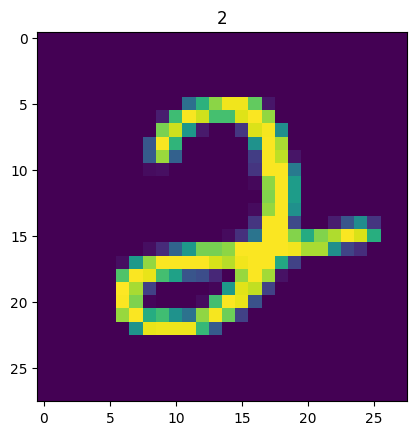

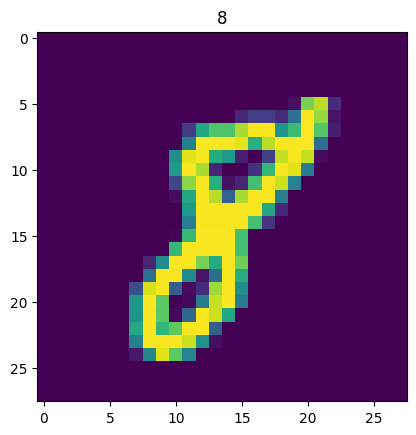

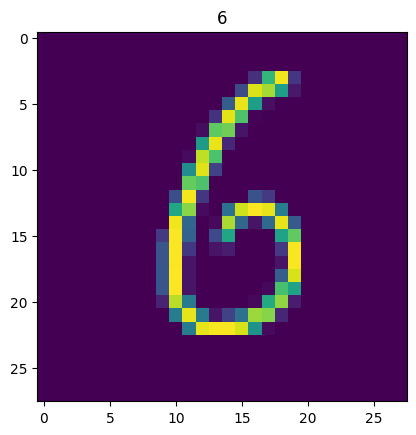

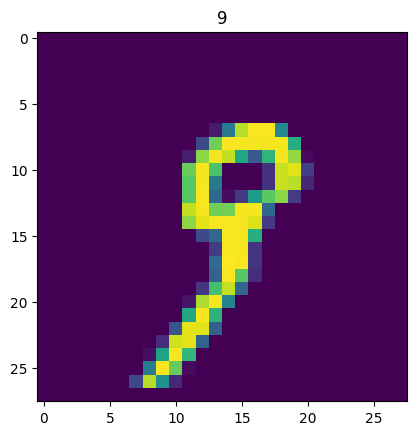

In [ ]:
for i in range(20):
  shownum(i)

**Normailizing the images in the range of 0 and 1**

In [ ]:
xtrain=xtrain.astype(np.float32)/255
xtest=xtest.astype(np.float32)/255

In [ ]:
xtrain,xtest

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


**Reshape or expand the image dimensions to (28,28,1)**

In [ ]:
xtrain=np.expand_dims(xtrain,-1)
xtest=np.expand_dims(xtest,-1)

**Converting the data from classes to categorical. It is the important aspect as it is important for training the model.**

In [ ]:
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [ ]:
ytest,ytrain

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

**Now we will build a Neural Network.
The first layer will be the input layer.
And then we will add the hidden layers to our network.
And in the final we will have the output layer**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),  activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


**After designing the model we will now get it's summary**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

**After building the model we will compile it so that we can use it for solving our problem.**

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4, verbose=1)
mc=ModelCheckpoint('./bestmodel.h5',monitor='val_acc',verbose=1, save_best_only=True)
cb=[es,mc]

**After compiling the model we will fit the training dataset and change the weighted values for every epoch.**

In [60]:
res=model.fit(xtrain,ytrain,epochs=32, validation_split=0.3)

Epoch 1/32
1313/1313 [==============================] - 54s 40ms/step - loss: 0.2139 - accuracy: 0.9349 - val_loss: 0.0767 - val_accuracy: 0.9760
Epoch 2/32
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0.0585 - val_accuracy: 0.9828
Epoch 3/32
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0488 - val_accuracy: 0.9846
Epoch 4/32
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0491 - val_accuracy: 0.9862
Epoch 5/32
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 6/32
1313/1313 [==============================] - 56s 42ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0464 - val_accuracy: 0.9858
Epoch 7/32
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0417 -

**We will now get the accuracy of the model we developed. Here we will use the evaluate method to get the accuracy score of the model.**

In [61]:
score=model.evaluate(xtest,ytest)

313/313 [==============================] - 4s 14ms/step - loss: 0.0448 - accuracy: 0.9901


In [64]:
print('The accuracy of the model is :',score[1]*100)

The accuracy of the model is : 99.01000261306763


# SUMMARY
**In our model we used keras for building Neural Network. We directly downloaded the dataset from the keras. We built input,hidden and output layers.Later we develop the model with many epochs and improve the accuracy. Finally we will get the model with a good accuracy.**